# Meteorite Data Visualzation 

In [1]:
import pandas as pd
meteorite=pd.read_csv('Meteorie - Copy.csv')
meteorite.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775, 6.08333)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.18333, 10.23333)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.21667, -113.0)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.88333, -99.9)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.16667, -64.95)"


# Dataset Description

In [2]:
meteorite.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45425.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.828817,-39.122580,61.074319
std,16860.683030,5.749889e+05,25.052766,46.378511,80.647298
min,1.000000,0.000000e+00,860.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2101.000000,81.166670,354.473330


# Meteorite Distribution Around World

In [11]:
import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(lat=meteorite.reclat, lon=meteorite.reclong,
                                 radius=10,colorscale='plasma'))
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

# Heatmap 

<Axes: >

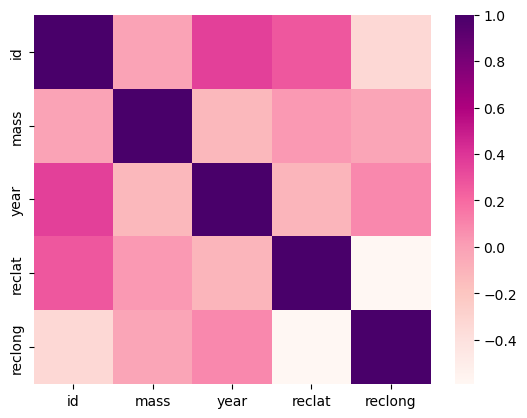

In [4]:
import numpy as np
import seaborn as sns
numerical_columns = meteorite.select_dtypes(include=[np.number])
correlation_matrix = numerical_columns.corr()
sns.heatmap(correlation_matrix, cmap='RdPu')

In [5]:
year=meteorite['year']
mass=meteorite['mass'].round(2)
fall=meteorite['fall']

# Relation between Mass and year of landing

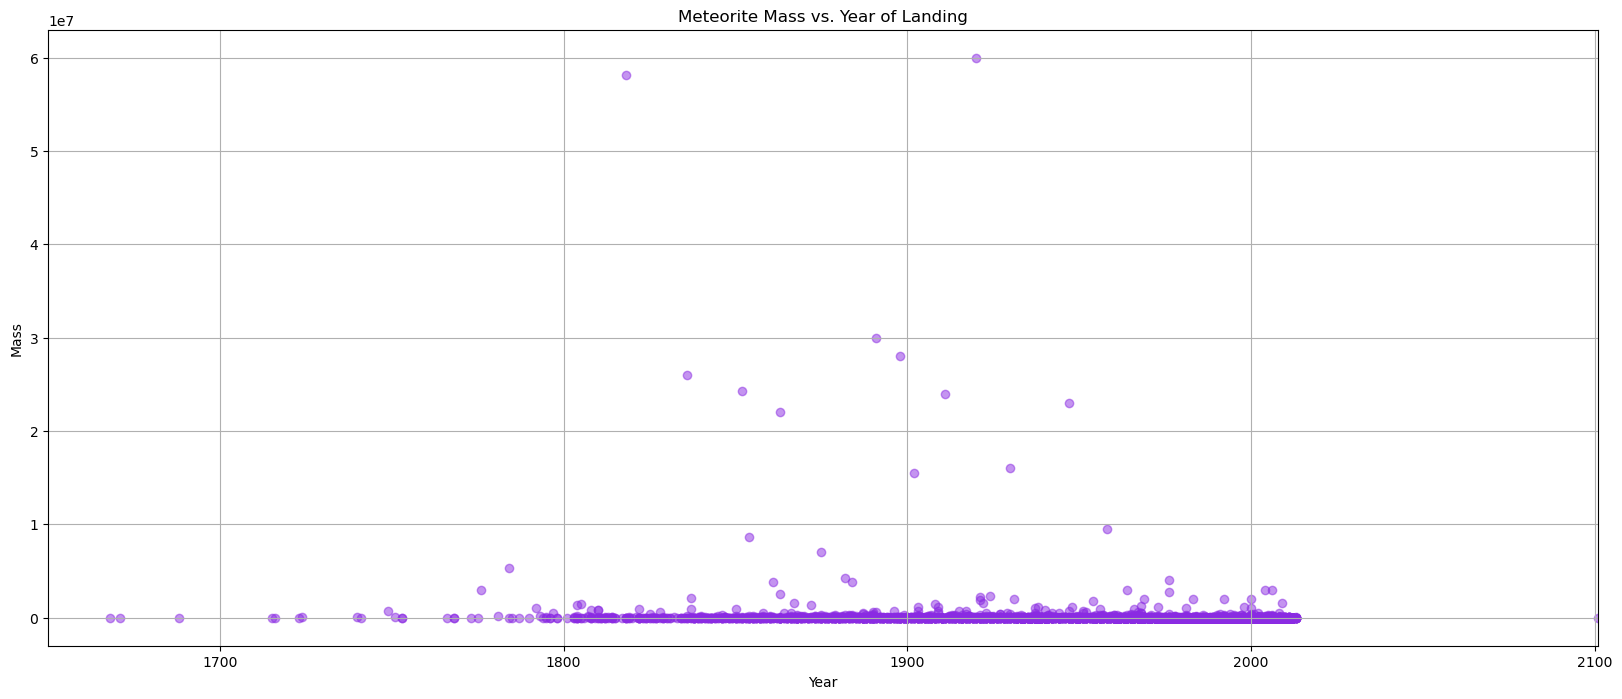

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 8))
plt.scatter(year, mass, alpha= 0.5, color='blueviolet')
plt.title('Meteorite Mass vs. Year of Landing')
plt.xlabel('Year')
plt.ylabel('Mass')
plt.grid(True)
plt.xlim(1650, max(year))
plt.show()

# Relation between Mass and fall

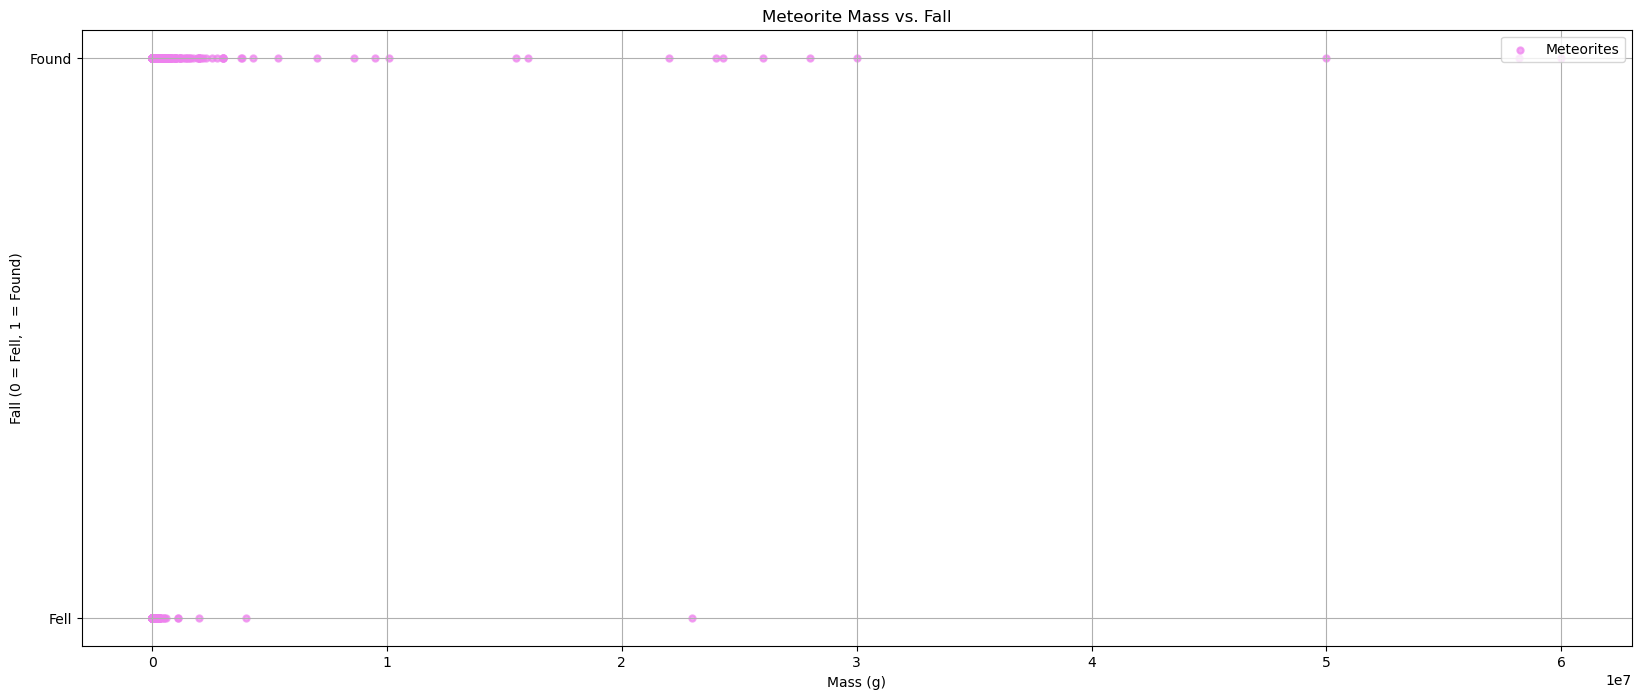

In [7]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20, 8))
marker_size = 20

plt.scatter(mass, fall, alpha=0.7, s=marker_size, c='violet', linewidths=1.5, label='Meteorites')
plt.title('Meteorite Mass vs. Fall')
plt.xlabel('Mass (g)')
plt.ylabel('Fall (0 = Fell, 1 = Found)')
plt.grid(True)

plt.legend(loc='upper right')

plt.show()


# Relation between year and fall

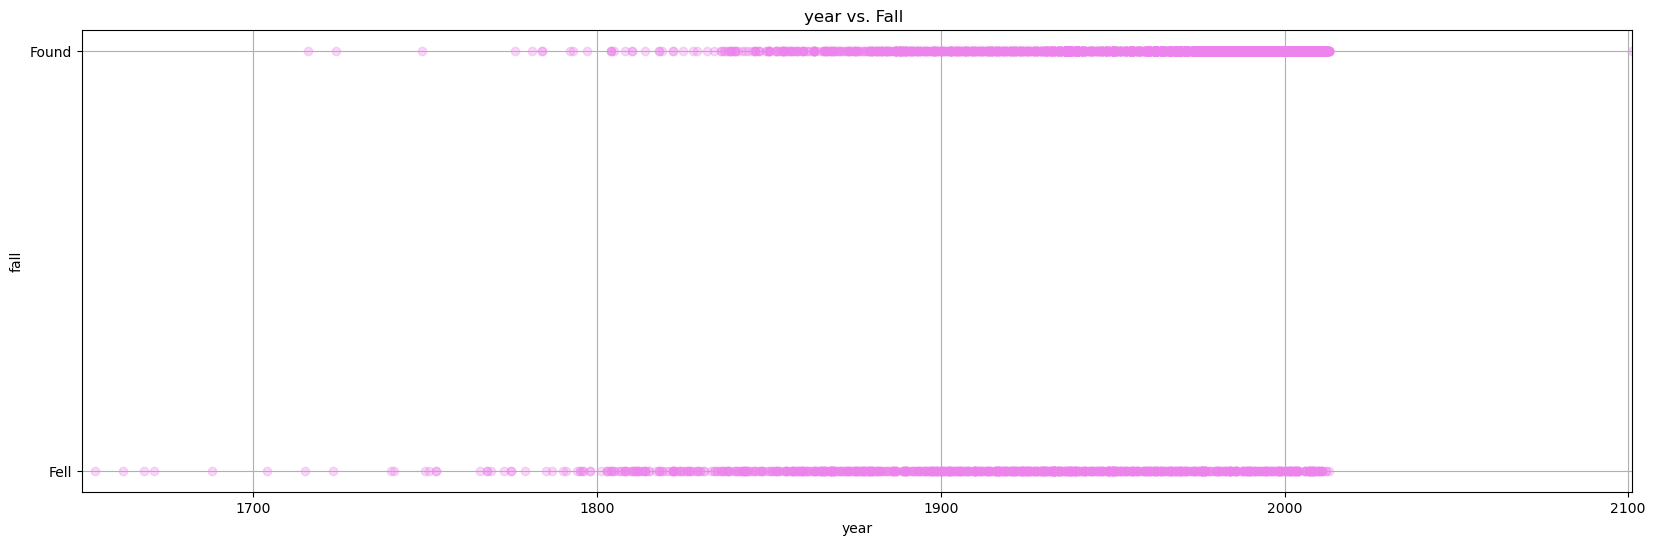

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 6))
plt.scatter(year , fall ,alpha=0.3,color='violet')
plt.title('year vs. Fall ')
plt.xlabel('year')
plt.ylabel('fall')
plt.xlim(1650, max(year))
plt.grid(True)
plt.show()

# Relation between Longitude, Longitude Fall

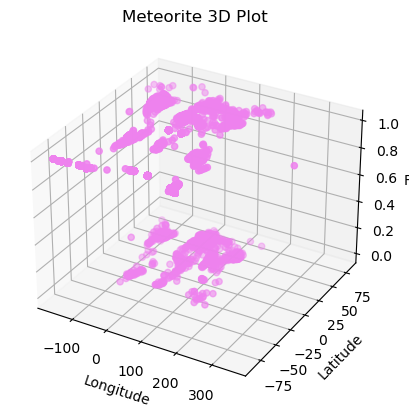

In [9]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
meteorite['fall'] = meteorite['fall'].replace({'Found':1,'Fell':0})
x = meteorite['reclong']   
y = meteorite['reclat']   
z = meteorite['fall']    

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x, y, z, c='violet', marker='o')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Fall')
ax.set_title('Meteorite 3D Plot')

plt.show()